# Primer on Practical Probability Interactive Hill Estimation 
This file is from Prof. Raphael Douady's course Primer.Kindly refrain from distributing it ahead, I hope it may increase your understanding of the concepts taught in the course. <br>
It demonstrates the use of Hill Estimator as taught in the excel file (Nasdaq-BTC Hill) taught by professor,feel free to reach use the parameters for play and better understanding of what happens.<br> 
His excel files are amazing this is in no way replacement, it is just a GUI to get the intuition

#### Functions to Load

In [2]:
pip install pandas matplotlib statsmodels ipywidgets openpyxl

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/89/1b/12521efcbc6058e2673583bb096c2b5046a9df39bd73eca392c1efed24e5/pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a7/68/16e7b9154fae61fb29f0f3450b39b855b89e6d2c598d67302e70f96883af/matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/9f/06/2f1d2ba024c802e812fe9e85eebc06871d76f1f4e0bb2beb0faa22cbe330/statsmodels-0.14.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/6a/94/a59521de836ef0da54aaf50da6c4da8fb4072fb3053fa71f052fd9399e7a/openpyxl-3.1.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.22.4 from h

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ipywidgets import interactive                     
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
%matplotlib inline

In [4]:
data = pd.read_excel('hill_nasdaq.xlsx')

#### Some basic Exploratory data analysis

In [458]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,NaN
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,0.008365
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,-0.000794
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,-0.000695
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,0.007520
...,...,...,...,...,...,...,...,...
12521,2020-09-28,11084.379883,11120.790039,11019.139648,11117.530273,11117.530273,3562900000,0.018517
12522,2020-09-29,11109.000000,11153.230469,11065.629883,11085.250000,11085.250000,3363870000,-0.002908
12523,2020-09-30,11092.900391,11277.959961,11092.900391,11167.509766,11167.509766,4228200000,0.007393
12524,2020-10-01,11291.990234,11344.129883,11240.530273,11326.509766,11326.509766,3978100000,0.014137


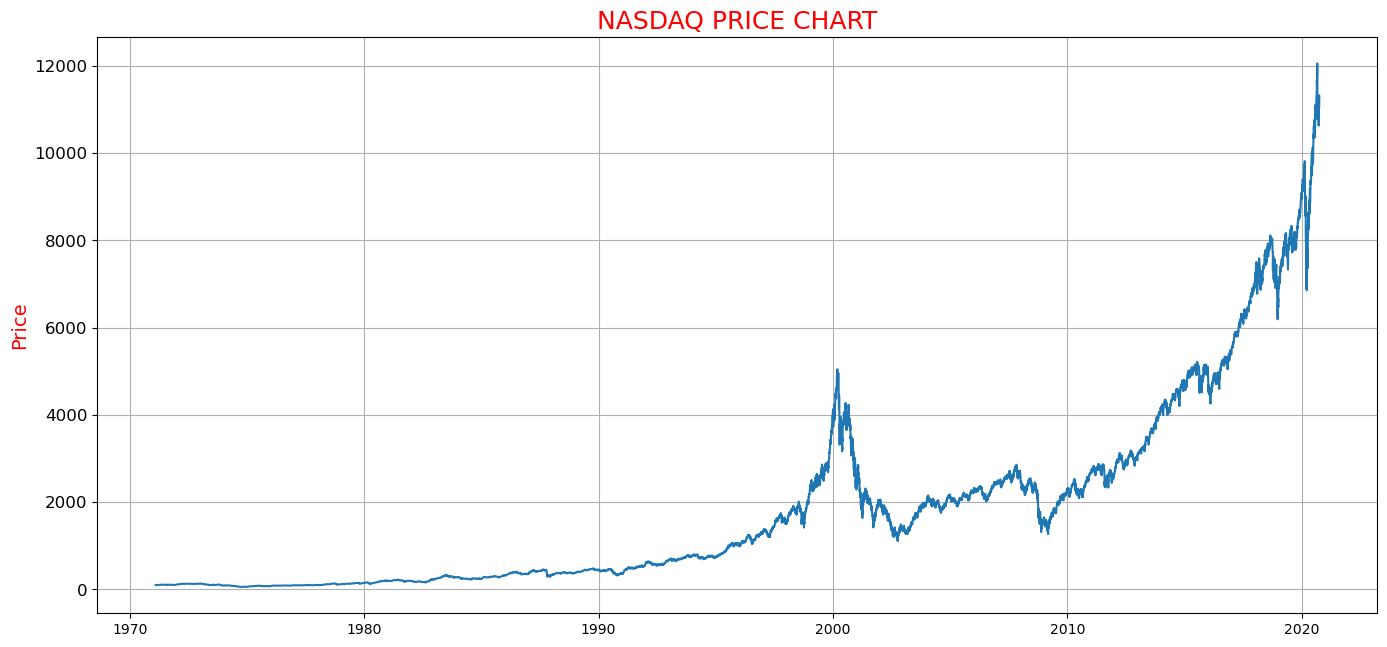

In [143]:
fig, ax = plt.subplots()

ax.plot(data.Date,data['Adj Close'])
plt.title('NASDAQ PRICE CHART',color='red',fontsize=18)
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.2);
plt.ylabel('Price',color='red',fontsize=14)
plt.tick_params(axis='y', labelsize=12)
plt.grid(True)

plt.show()

In [145]:
#Getting the returns
data['returns']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

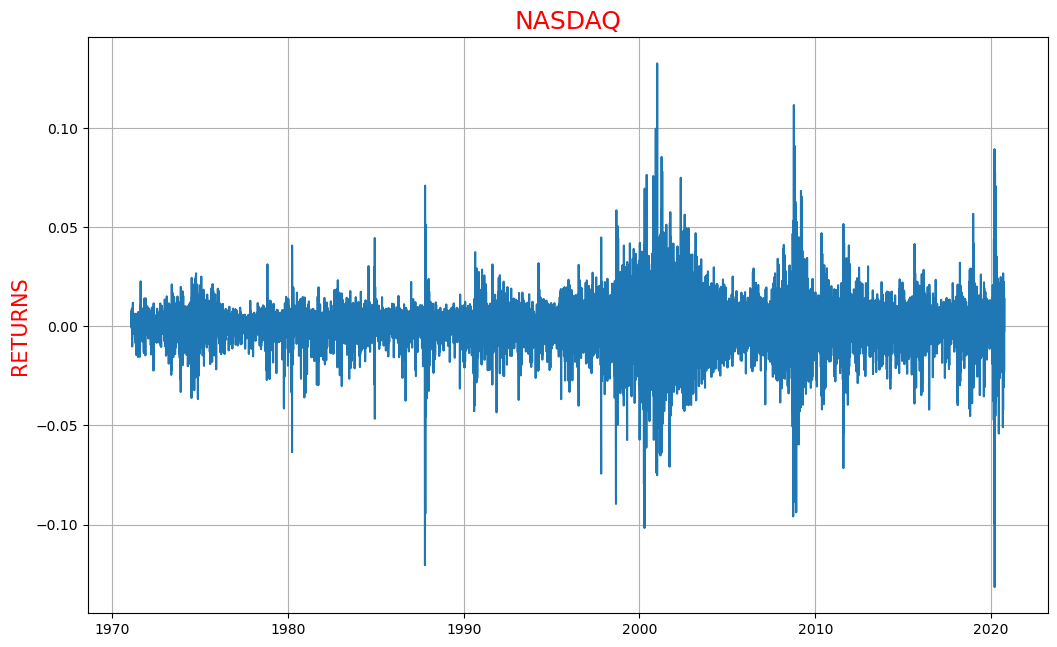

In [146]:
fig, ax = plt.subplots()

ax.plot(data.Date,data['returns'])
plt.title('NASDAQ',color='red',fontsize=18)
plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=1.2);
plt.ylabel('RETURNS',color='red',fontsize=15)
plt.grid(True)
plt.show()

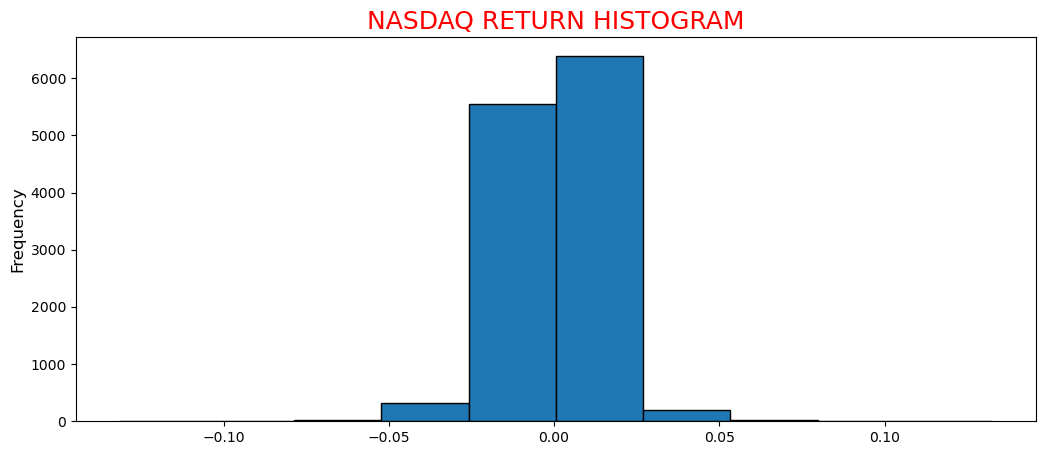

In [248]:
fig, ax = plt.subplots()

ax.hist(data['returns'],edgecolor='black')
plt.title('NASDAQ RETURN HISTOGRAM',color='red',fontsize=18)
plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=0.8);
plt.ylabel('Frequency',color='black',fontsize=12)

plt.show()

In [148]:
data['returns'].describe()

count    12525.000000
mean         0.000376
std          0.012536
min         -0.131492
25%         -0.004431
50%          0.001071
75%          0.006070
max          0.132546
Name: returns, dtype: float64

#### Interactive Hill Estimator
Hill estimator as already explained by professor in the slides will be estimated using this regression<br>
<br>
<center>
  <span class="tex">
    ${\Large\frac{\ln j}{\ln n} \approx \ln c - \alpha x_j}$
  </span>
</center>
<br>

1. As a first step we will arrange returns in descending order
2. $j$ is the sequence of occurence
4. While $Percentage$ From where the power laws start (How much % of data). You can play with this parameter
5. $Skip$ how many Datapoints you want to avoid fitting from the top (to avoid overfitting)
6. Origin - Locational shift if any required  (mentioned as $m$  in the slides)
7. Var - Var gets the Var and CVAR 
8. Positive or negative returns choice remains yours
<br>
<br>
You can play with parameters 3 to 5 and see the effect on the fitted line

#### Functions for Regression

In [381]:
def reg_lin(data,side,percentage,m,skip):
    if side == 'positive':
        ret_analytic = data['returns'][data['returns']>0]
        ret_analytic = ret_analytic.sort_values()[::-1]    
    else:
        ret_analytic = data['returns'][data['returns']<0]
        ret_analytic = ret_analytic.sort_values()
  
    number = int(len(ret_analytic)*percentage) 
    x=  np.log(np.abs(ret_analytic.iloc[skip:number].values-m))             # Ln(x-Origin)
    mod_x = sm.add_constant(x)                                   # This is constant Ln(c) added
    y= np.log(np.arange(number-skip)+1)-np.log(len(ret_analytic))    #Ln(j)-Ln(n)~ Ln(p)

    mod = sm.OLS(y, mod_x)
    res = mod.fit()

    return {
        'x':x,
        'y':y,
        'mod_x':mod_x,
        'res':res}

#### Parameters and Main Code

In [459]:


l= widgets.Text(value='Interactive Hill estimator Plot (based on PPP By Prof Raphael Douday)',
                 layout=Layout(width='750px', height='30px'))
percentage = widgets.FloatSlider(min=0.01, max = 0.25, value=0.05, step = 0.01, description = 'Percentage',orientation='horizontal', 
           style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)
skip = widgets.IntSlider(min=0, max = 50, value=3, step = 1, description = r'skip',orientation='horizontal',
           style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)
side= widgets.Dropdown(options=['positive', 'negative'],description = r'side',orientation='horizontal',value='negative',
             style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)
var = widgets.BoundedFloatText(min=0.01, max = 0.99, value=0.99,step=0.01, description = r'var',orientation='horizontal',
           style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)
m =  widgets.FloatText( value=0, description = r'm',orientation='horizontal',
           style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)

ui2 = widgets.HBox([side,var,m])
ui = widgets.VBox([percentage,skip])
ui3 = widgets.VBox([ui2,ui])

def main_plot(side,percentage,m,skip,var,data=data):
    fin_res = reg_lin(data,side=side,percentage=percentage,m=m,skip=skip)
    x=fin_res['x'] 
    y=fin_res['y']
    mod_x=fin_res['mod_x']
    res = fin_res['res']
    plt.subplots(1)
    
    plt.plot(x,y,'o',label='actual points')
    plt.plot(x,res.predict(mod_x),label='fitted line')
    details = (
        f'y = {res.params[0]:.2f} + {res.params[1]:.2f}x\n'
        f'alpha: {-res.params[1]:.2f}\n' 
        f'R-squared: {res.rsquared:.2f}\n'
        f'Number of observations: {int(res.nobs)}\n'
        f'Var {var:.0%}: {np.exp((var-res.params[0])/res.params[1])+m:.2%}\n'
        f'CVAR: {m+np.exp((var-res.params[0])/res.params[1])*(-res.params[1]/(-res.params[1]-1)):.2%}'
    )
    
    plt.text(0.01, 0.3, details, transform=plt.gca().transAxes,
             fontsize=12,color='red', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.95))
    plt.ylabel('Ln(p)',color='blue')
    plt.xlabel('Ln|Return-Origin|',color='blue')
    plt.legend(loc='upper right')
    plt.grid()
    plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=0.8)
    plt.title('Hill Estimator Zipf Plot',color='red',fontsize=18)
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(main_plot, {'side':side,'percentage':percentage,
                                                            'm':m,'skip':skip,'var':var})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating  

## Final Interactive

In [460]:
display(ui3, interactive_plot)   

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 1 Axes>', 'i…

1. Var values can increment in 0.01 steps from 0.01 to 0.99
2. m can be any float
3. Percentage also increments in 0.01
4. skip is an integer to skip upto 50 values
5. side is which side of distribution you want to fit

## Comments
Senstivity - Change the values of inputs see the effects on fitted values, alpha, var,R-squared<br>

Besides hill estimator, some good techniques<br>
1. Very good paper on Power-law distributions in empirical data,by Clause-et al.
2. Prof. Dr. Pasquale Cirillo techniques<br>

I hope this interactive clarifies and gives you some intuition regarding the hill plot
Any mistakes or Errors are mine. 
Further this is not the official version and not validated by Prof Douady if you need any kind.<br>

Distribution of Slides for PPP is not allowed, Similarly applies for codes.

